In [2]:
#For general data manipulation
import pandas as pd
#package for interacting with the Open Data API
from sodapy import Socrata

In [3]:
# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.sfgov.org", "6MxY0IBE0i8PhcQtqMYKjKm7g")

#First 489000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("wg3w-h783", limit=489000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Basic Descriptive Statistics

In [5]:
results_df.shape

(489000, 33)

It appears our data has 33 columns and 489,000 rows (which matches up with what we know).

In [6]:
results_df.columns

Index(['incident_datetime', 'incident_date', 'incident_time', 'incident_year',
       'incident_day_of_week', 'report_datetime', 'row_id', 'incident_id',
       'incident_number', 'cad_number', 'report_type_code',
       'report_type_description', 'incident_code', 'incident_category',
       'incident_subcategory', 'incident_description', 'resolution',
       'intersection', 'cnn', 'police_district', 'analysis_neighborhood',
       'supervisor_district', 'latitude', 'longitude', 'point',
       ':@computed_region_jwn9_ihcz', ':@computed_region_26cr_cadq',
       ':@computed_region_qgnn_b9vv', 'filed_online',
       ':@computed_region_nqbw_i6c3', ':@computed_region_jg9y_a9du',
       ':@computed_region_n4xg_c4py', ':@computed_region_h4ep_8xdi'],
      dtype='object')

In [7]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489000 entries, 0 to 488999
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   incident_datetime            489000 non-null  object
 1   incident_date                489000 non-null  object
 2   incident_time                489000 non-null  object
 3   incident_year                489000 non-null  object
 4   incident_day_of_week         489000 non-null  object
 5   report_datetime              489000 non-null  object
 6   row_id                       489000 non-null  object
 7   incident_id                  489000 non-null  object
 8   incident_number              489000 non-null  object
 9   cad_number                   381871 non-null  object
 10  report_type_code             489000 non-null  object
 11  report_type_description      489000 non-null  object
 12  incident_code                489000 non-null  object
 13  incident_categ

In [9]:
results_df.isnull().sum()

incident_datetime                   0
incident_date                       0
incident_time                       0
incident_year                       0
incident_day_of_week                0
report_datetime                     0
row_id                              0
incident_id                         0
incident_number                     0
cad_number                     107129
report_type_code                    0
report_type_description             0
incident_code                       0
incident_category                 418
incident_subcategory              418
incident_description                0
resolution                          0
intersection                    24947
cnn                             24947
police_district                     0
analysis_neighborhood           24947
supervisor_district             24947
latitude                        24947
longitude                       24947
point                           24947
:@computed_region_jwn9_ihcz     35015
:@computed_r

Observations: 'Incident Year' and 'Incident Day of Week' show the expected value ranges. Data has a significant number of rows with missing values. Largest being the columns where the incident location would be listed ('Intersection' , 'CNN' , 'Supervisor District', 'Latitude', 'Longitude', 'shape', 'Analysis Neighborhood', & 'Neighborhoods'). This may be due to the number of incident reports that were filed online, thus there would not be an officer on seen to list the location in the report.

In [ ]:
police_data_df["Incident Code"].unique()

In [ ]:
police_data_df["Report Type Code"].value_counts()

In [5]:
police_data_df['Resolution'].value_counts()

Open or Active          368571
Cite or Arrest Adult     98599
Unfounded                 2963
Exceptional Adult         1220
Name: Resolution, dtype: int64

In [25]:
results_df[''].value_counts()

Friday       74597
Wednesday    72151
Monday       69904
Saturday     69450
Thursday     69257
Tuesday      69011
Sunday       64630
Name: incident_day_of_week, dtype: int64

# Data Visualizations

In [18]:
cols = [
    'Analysis Neighborhood',
    'Incident Code',
    'Incident Category',
    'Incident Subcategory',
    'Incident Description'
]

for col in cols:
    out = (
        police_data_df
        .groupby([col])
        .size()
        .reset_index(name='counts')
    )
    print(out.sort_values(by=['counts'], ascending=False).head(10))

             Analysis Neighborhood  counts
18                         Mission   44741
35                      Tenderloin   41374
5   Financial District/South Beach   34769
33                 South of Market   33451
0            Bayview Hunters Point   24663
40                Western Addition   13143
2              Castro/Upper Market   12377
22                     North Beach   12145
34                 Sunset/Parkside   11764
20                        Nob Hill   11681
     Incident Code  counts
225         6244.0   53411
780        71000.0   13774
659        28150.0   13323
251         6372.0   12824
120         4134.0   12421
274         7041.0   10725
740        64020.0   10326
267         7021.0   10267
253         6374.0   10119
215         6224.0    7570
      Incident Category  counts
18        Larceny Theft  129152
29  Other Miscellaneous   31292
21   Malicious Mischief   27095
26         Non-Criminal   26042
1               Assault   25222
2              Burglary   22506
24  Mo

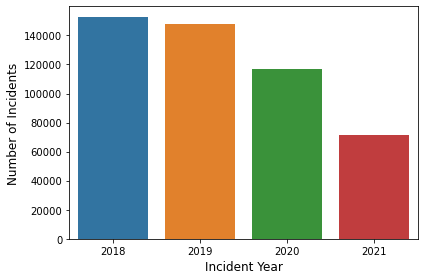

In [23]:
Incidents_by_Year = sns.countplot(x="incident_year", data=results_df, order = results_df['incident_year'].value_counts().index)
# set labels
plt.xlabel("Incident Year", size=12)
plt.ylabel("Number of Incidents", size=12)
plt.tight_layout()

Here we see the number of incidents broken down by calendar year. The only interesting note is the sharp decrease in number of incidents in 2020, but there's a good reason for that anomaly.

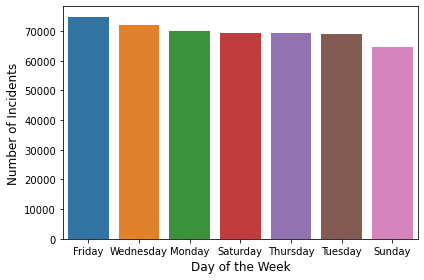

In [30]:
Incidents_by_Day_of_Week = sns.countplot(x="incident_day_of_week",  data=results_df, 
                                         order = results_df['incident_day_of_week'].value_counts().index)
# set labels
plt.xlabel("Day of the Week", size=12)
plt.ylabel("Number of Incidents", size=12)
plt.tight_layout()

Nothing to note here in incidents by day of the week, things appear very standard across the week.

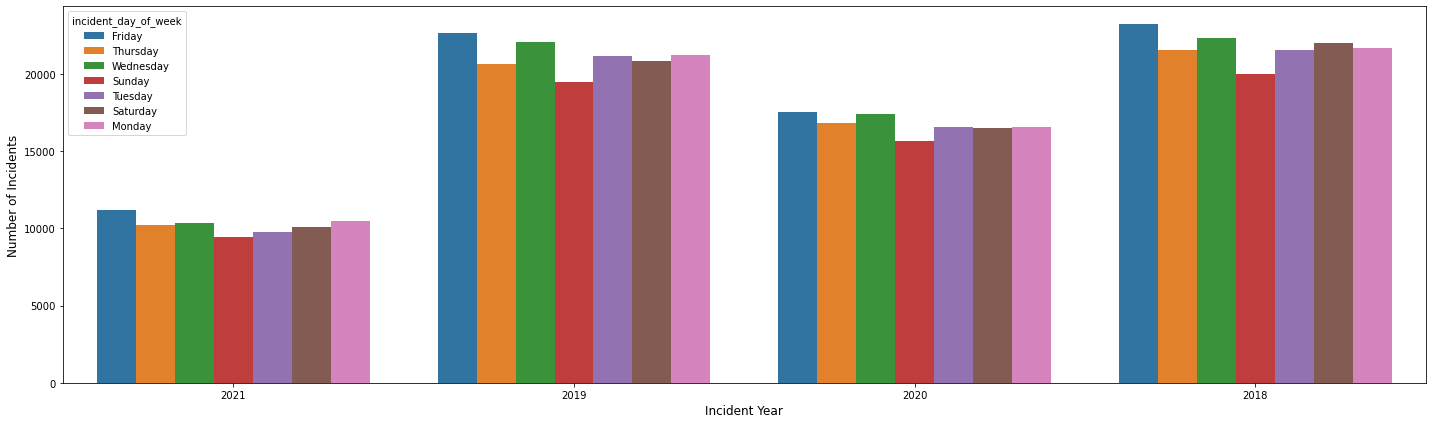

In [29]:
plt.figure(figsize=(20,6))
Incidents_by_Year_by_Day_of_Week = sns.countplot(x="incident_year", hue = "incident_day_of_week", data=results_df)
# set labels
plt.xlabel("Incident Year", size=12)
plt.ylabel("Number of Incidents", size=12)
plt.tight_layout()

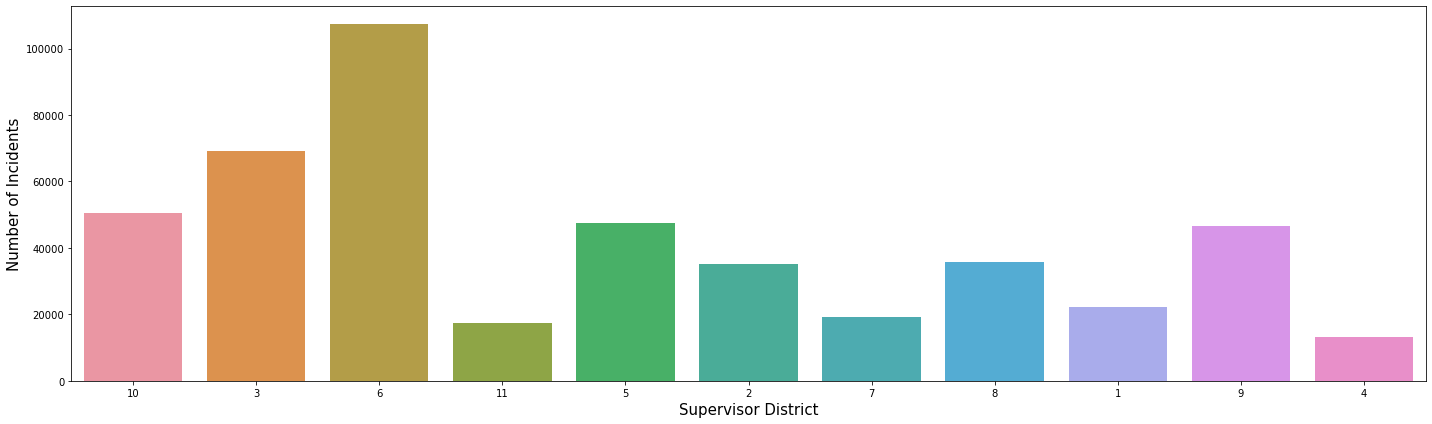

In [42]:
plt.figure(figsize=(20,6))
Incidents_by_District = sns.countplot(x="supervisor_district", data=results_df)
# set labels
plt.xlabel("Supervisor District", size=15)
plt.ylabel("Number of Incidents", size=15)
plt.tight_layout()

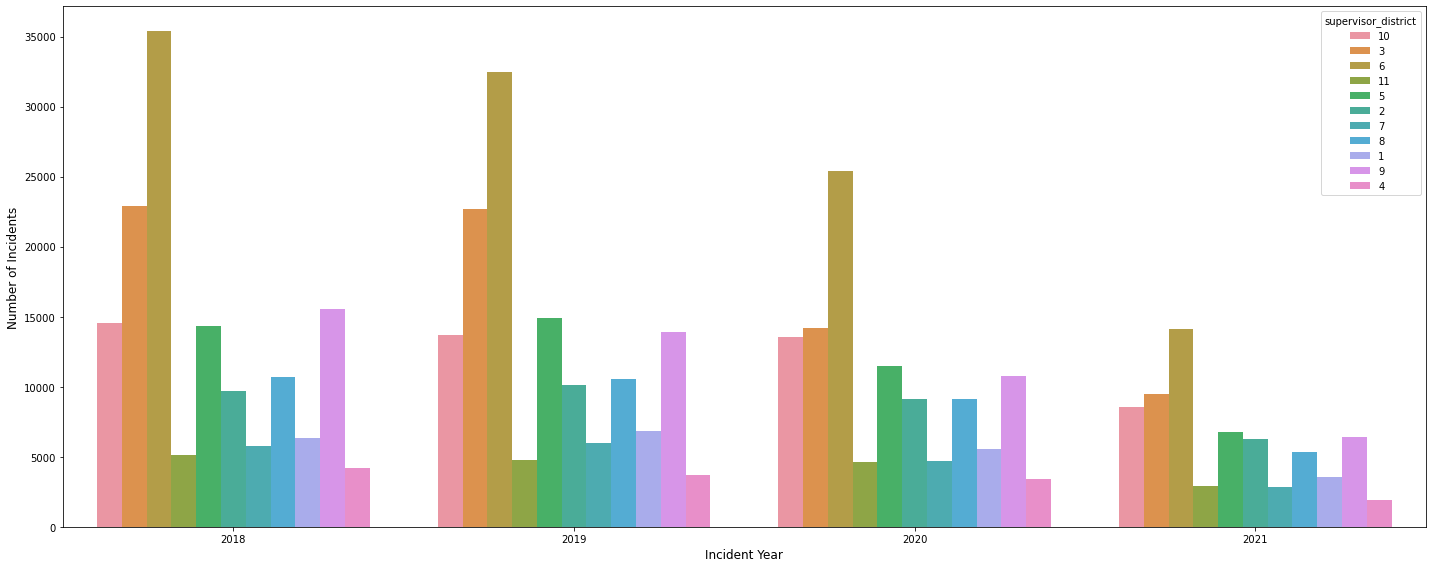

In [41]:
plt.figure(figsize=(20,8))
District_Incidents_by_Year = sns.countplot(x="incident_year", hue = "supervisor_district", 
                                           data=results_df, 
                                           order = results_df['incident_year'].value_counts().index)
# set labels
plt.xlabel("Incident Year", size=12)
plt.ylabel("Number of Incidents", size=12)
plt.tight_layout()
plt.tight_layout()

Correlation Matrix of Incidents by Time